In [57]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## RHS-14

Coordinates: x = 335798.986, y = 4264089.99, z = 1690.84658

Lithology: Basin Fill

Depth: 137.5 m

In [66]:
depth = 137.5
start_x = 335798.986
start_y = 4264089.99
start_z = 1690.84658

r = np.arange(0.0, depth + 0.5, 0.5)
phi = np.zeros(len(r))
theta = np.zeros(len(r))    

In [67]:
for x in range(0, len(r)):
    theta[x] = -90

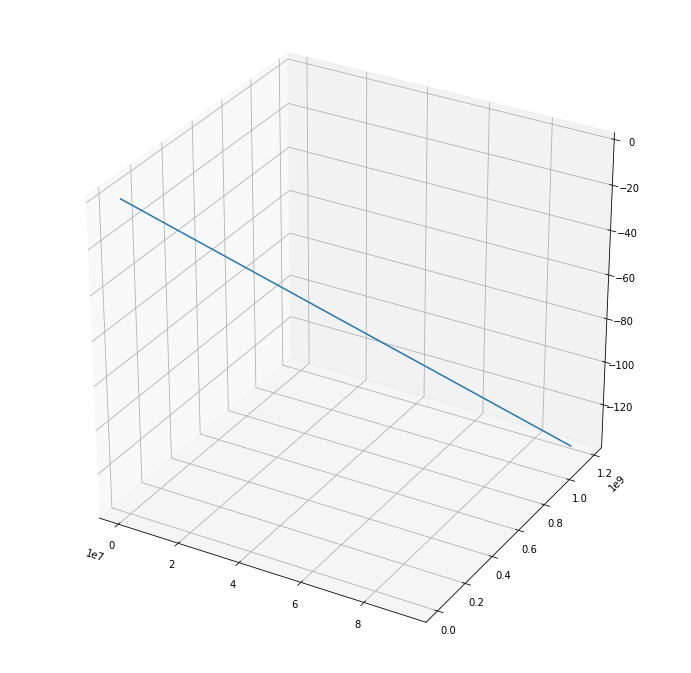

In [68]:
#Well trajectory

fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(111, projection = '3d')

# get lengths of the separate segments 
r[1:] = r[1:] - r[:-1]
# convert to radians
phi = phi * 2 * np.pi / 360.
theta = (90-theta) * 2 * np.pi / 360.
# get x, y, z from known formulae
x = start_x + (r*np.cos(phi)*np.sin(theta))
y = start_y + (r*np.sin(phi)*np.sin(theta))
z = (r*np.cos(theta))

# np.cumsum is employed to gradually sum resultant vectors 
ax.plot(np.cumsum(x),np.cumsum(y),np.cumsum(z))


plt.show()

In [72]:
elevation = np.cumsum(z) + start_z

In [70]:
import vtki

well_traj_adam = vtki.PolyData(np.c_[x,y,elevation])
well_traj_adam.save('well_RHS14.vtk')

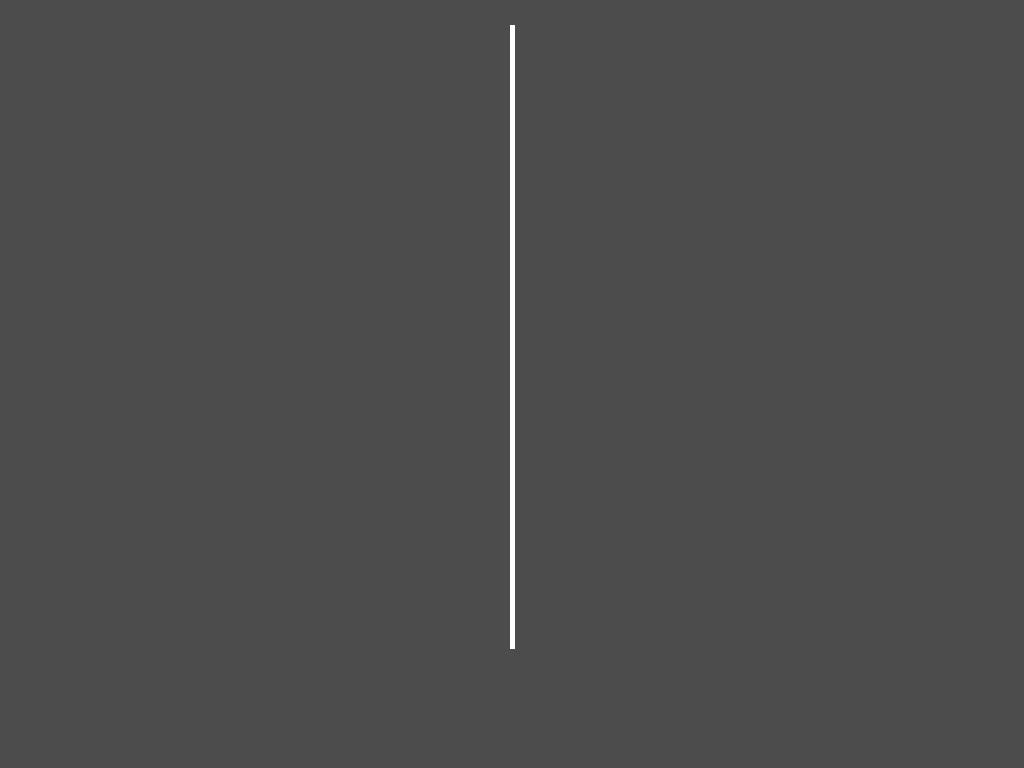

In [71]:
well_traj_adam.plot()